#**REDDIT APP DATA / ASSIGNMENT-3**

**AUTHENTICATION**

In [54]:
pip install praw

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
#importing praw package
import praw
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="_pv720xfCgXOHEmbgBNCgg",
    client_secret="3k3wbDwk3dRlWrlw7CzB62_3RX_NIA",
    user_agent=user_agent)

**IMPORTING PACKAGES**

In [56]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression


**SELECT TRENDING TOPIC FROM REDDIT**

The "ipl" subreddit channel will be use for this project

In [57]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("ipl").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Hey everyone! Joy Bhattacharjya here, ready for my AMA in r/ipl. Let's talk cricket, IPL, KKR, and more. Ask me anything!
1bhrf14
JBVV66
1710770410.0
290
0.97
https://www.reddit.com/r/ipl/comments/1bhrf14/hey_everyone_joy_bhattacharjya_here_ready_for_my/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [58]:
#top posts from the "ipl" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("ipl").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

880



**SCRAPPED DATA**

In [59]:
#Create a dataframe from the scrapped data
df = pd.DataFrame(headlines)
df.head()

,0
0,"Yesterday, MS Dhoni completed 16 years with Ch..."
1,I made these in 2021
2,Aaron Finch has featured for the most teams by...
3,Why did Dhoni pick No. 7? Thala for a reason
4,James Faulkner - 2013 legend 🔥


**REMOVING UNWANTED COLUMNS**

In [60]:
df_new = df.iloc[:, 1:]#removes unwanted columns in left
df.head()

,0
0,"Yesterday, MS Dhoni completed 16 years with Ch..."
1,I made these in 2021
2,Aaron Finch has featured for the most teams by...
3,Why did Dhoni pick No. 7? Thala for a reason
4,James Faulkner - 2013 legend 🔥



**RETRIEVING COLUMN NAME**

In [61]:
#gives the column names
df.columns

RangeIndex(start=0, stop=1, step=1)


**RENAMING COLUMNS**

In [62]:
#renaming the column to titles
df.columns = ['Titles']

**HEAD METHOD**

In [63]:
#Gives first five columns in the dataframe
df.head()

,Titles
0,"Yesterday, MS Dhoni completed 16 years with Ch..."
1,I made these in 2021
2,Aaron Finch has featured for the most teams by...
3,Why did Dhoni pick No. 7? Thala for a reason
4,James Faulkner - 2013 legend 🔥


**COUNTING DUPLICATE VALUES**

In [64]:
#counts the number of duplicate values in the 'Titles' column
df.Titles.duplicated().sum()

0

REDDIT APP DATA PREPROCESSING FOR ipl ANALYSIS

In [65]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)

#Show the clean text
df.head()

,Titles
0,"Yesterday, MS Dhoni completed 16 years with Ch..."
1,I made these in 2021
2,Aaron Finch has featured for the most teams by...
3,Why did Dhoni pick No. 7? Thala for a reason
4,James Faulkner - 2013 legend 🔥



**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [66]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,"Yesterday, MS Dhoni completed 16 years with Ch..."
1,I made these in 2021
2,Aaron Finch has featured for the most teams by...
3,Why did Dhoni pick No. 7? Thala for a reason
4,James Faulkner - 2013 legend



**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [67]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF ipl RELATED TEXT**

In [68]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,"Yesterday, MS Dhoni completed 16 years with Ch...",0.666667,0.333333
1,I made these in 2021,0.000000,0.000000
2,Aaron Finch has featured for the most teams by...,0.500000,0.500000
3,Why did Dhoni pick No. 7? Thala for a reason,0.000000,0.000000
4,James Faulkner - 2013 legend,0.000000,0.000000


**CATEGORIZING SWIFTIE SENTIMENT**

In [69]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df["Insight"] = df["Polarity"].apply(getInsight)
df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Yesterday, MS Dhoni completed 16 years with Ch...",0.666667,0.333333,Positive
1,I made these in 2021,0.000000,0.000000,Neutral
2,Aaron Finch has featured for the most teams by...,0.500000,0.500000,Positive
3,Why did Dhoni pick No. 7? Thala for a reason,0.000000,0.000000,Neutral
4,James Faulkner - 2013 legend,0.000000,0.000000,Neutral
5,Delhi Capitals fans makinng Rishabh Pant never...,0.000000,0.000000,Neutral
6,Streets won’t forget Prime Andre Russell. Enjo...,0.450000,0.262500,Positive
7,Xavier Bartlett for RCB as a replacement,0.000000,0.000000,Neutral
8,Brendon McCullum scores 158* in the very first...,0.433333,0.325000,Positive
9,now i knew the reason,0.000000,0.000000,Neutral


**DATA VISUALIZATION**

In [70]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**VISUALIZING SWIFTIE SENTIMENT DISTRIBUTION**

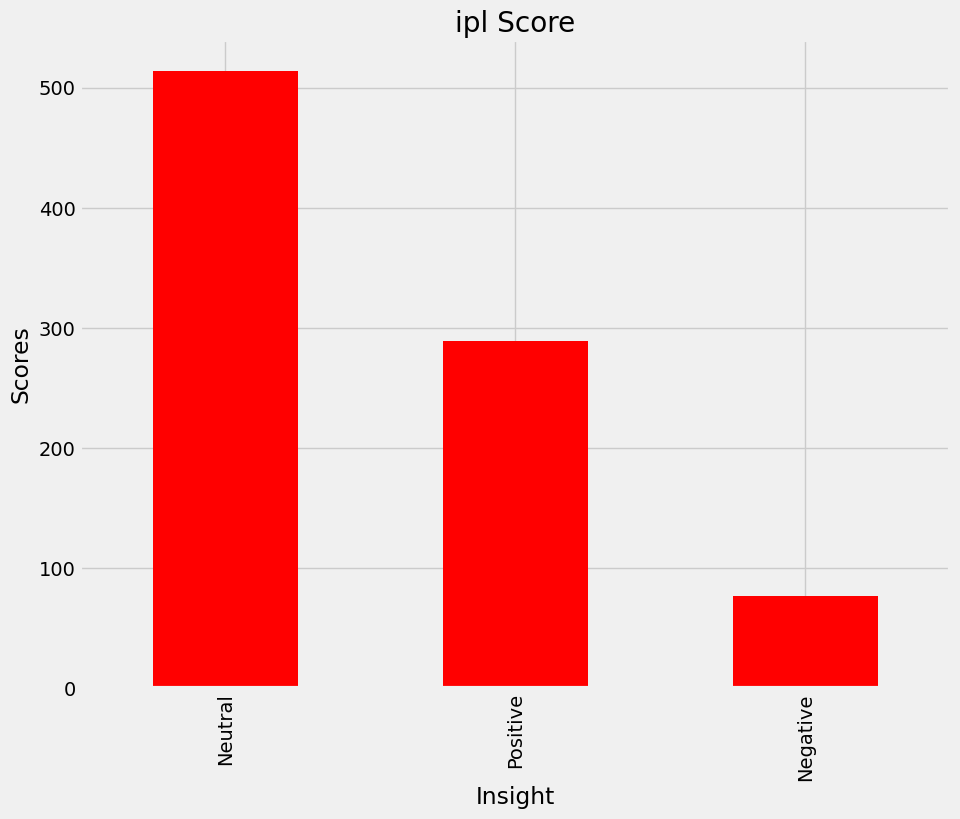

In [71]:
#Plot the values count of sentiment
plt.title("ipl Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="red")
plt.show()


**WORDCLOUD FOR RECESSION**

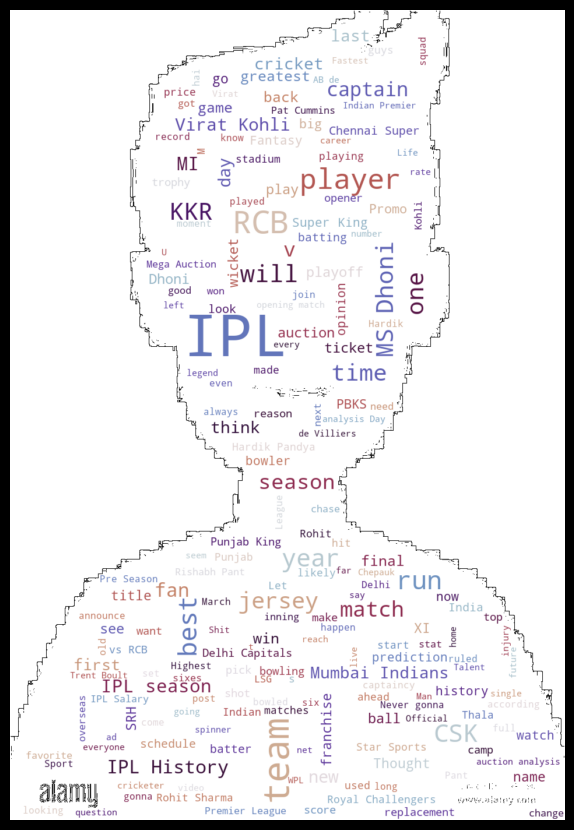

In [72]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in df['Titles']] )

image = Image.open(r"C:\Users\HP\Downloads\young-man-cartoon-MRPM90.jpg")
mask = np.array(image)

max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000,
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.01,
                      colormap = 'twilight',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

#**EXAMPLE2 : military**

**AUTHENTICATION**

In [73]:
#importing praw package
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

**IMPORTING PACKAGES**

In [74]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

**SELECT TRENDING TOPIC FROM REDDIT**

The "military" subreddit channel will be use for this project

In [75]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("datascience").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Weekly Entering & Transitioning - Thread 18 Mar, 2024 - 25 Mar, 2024
1bhhsd0
AutoModerator
1710734483.0
2
0.67
https://www.reddit.com/r/datascience/comments/1bhhsd0/weekly_entering_transitioning_thread_18_mar_2024/
0



**GET TOTAL COMMENT IN SUBREDDIT**

In [76]:
#top posts from the "military" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("military").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

739



**SCRAPPED DATA**

In [77]:
#Create a dataframe from the scrapped data
df2 = pd.DataFrame(headlines)
df2.head()

,0
0,Do you need references to join the navy? Or an...
1,Taurus
2,US Air Force member dies after setting himself...
3,Ammo in battle
4,If a young man joined Scottish or English army...



**REMOVING UNWANTED COLUMNS**

In [78]:
df = df2.iloc[:, 1:]#removes unwanted columns in left
df2.head()

,0
0,Do you need references to join the navy? Or an...
1,Taurus
2,US Air Force member dies after setting himself...
3,Ammo in battle
4,If a young man joined Scottish or English army...



**RETRIEVING COLUMN NAME**

In [79]:
#gives the column names
df2.columns

RangeIndex(start=0, stop=1, step=1)

**RENAMING COLUMNS**

In [80]:
#renaming the column to titles
df2.columns = ['Titles']


**HEAD METHOD**

In [81]:
#Gives first five columns in the dataframe
df2.head()

,Titles
0,Do you need references to join the navy? Or an...
1,Taurus
2,US Air Force member dies after setting himself...
3,Ammo in battle
4,If a young man joined Scottish or English army...



**COUNTING DUPLICATE VALUES**

In [82]:
#counts the number of duplicate values in the 'Titles' column
df2.Titles.duplicated().sum()

0


REDDIT APP DATA PREPROCESSING FOR military ANALYSIS

In [83]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
df2["Titles"]= df2["Titles"].apply(cleanTxt)

#Show the clean text
df2.head()

,Titles
0,Do you need references to join the navy? Or an...
1,Taurus
2,US Air Force member dies after setting himself...
3,Ammo in battle
4,If a young man joined Scottish or English army...



**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [84]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF DATASCIENCE RELATED TEXT**

In [85]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df2['Subjectivity'] = df2['Titles'].apply(getSubjectivity)
df2['Polarity'] = df2['Titles'].apply(getPolarity)

#Now display data
df2.head()

,Titles,Subjectivity,Polarity
0,Do you need references to join the navy? Or an...,0.0,0.00
1,Taurus,0.0,0.00
2,US Air Force member dies after setting himself...,0.8,0.40
3,Ammo in battle,0.0,0.00
4,If a young man joined Scottish or English army...,0.2,0.05


**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [86]:
# Next we have to remove emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
df2["Titles"]= df2["Titles"].apply(remove_emoji)

# Show the clean text
df2.head()

,Titles,Subjectivity,Polarity
0,Do you need references to join the navy? Or an...,0.0,0.00
1,Taurus,0.0,0.00
2,US Air Force member dies after setting himself...,0.8,0.40
3,Ammo in battle,0.0,0.00
4,If a young man joined Scottish or English army...,0.2,0.05


**CATEGORIZING DATASCIENCE SENTIMENT**

In [87]:
#Group the range of Subjectivity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df2["Insight"] = df2["Subjectivity"].apply(getInsight)

df2.head(20)

,Titles,Subjectivity,Polarity,Insight
0,Do you need references to join the navy? Or an...,0.000000,0.000000,Neutral
1,Taurus,0.000000,0.000000,Neutral
2,US Air Force member dies after setting himself...,0.800000,0.400000,Positive
3,Ammo in battle,0.000000,0.000000,Neutral
4,If a young man joined Scottish or English army...,0.200000,0.050000,Positive
5,Military clears Ospreys to fly again after a s...,0.500000,0.350000,Positive
6,Watch Gold Star father yells at Biden during S...,0.000000,0.000000,Neutral
7,"Since 1954, Lockheed has built 2,700 Hercs. Ne...",0.166667,-0.166667,Positive
8,Soviet soldier in afghanistan (date unknown),0.600000,-0.100000,Positive
9,Ultra-Orthodox Jews break with tradition to en...,0.100000,-0.100000,Positive



**COLUMNS OF DATASCIENCE**

In [88]:
print(df2.columns)

Index(['Titles', 'Subjectivity', 'Polarity', 'Insight'], dtype='object')



**DATA VISUALIZATION**

In [89]:
# create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**DATA VISUALIZATION FOR DATASCIENCE**

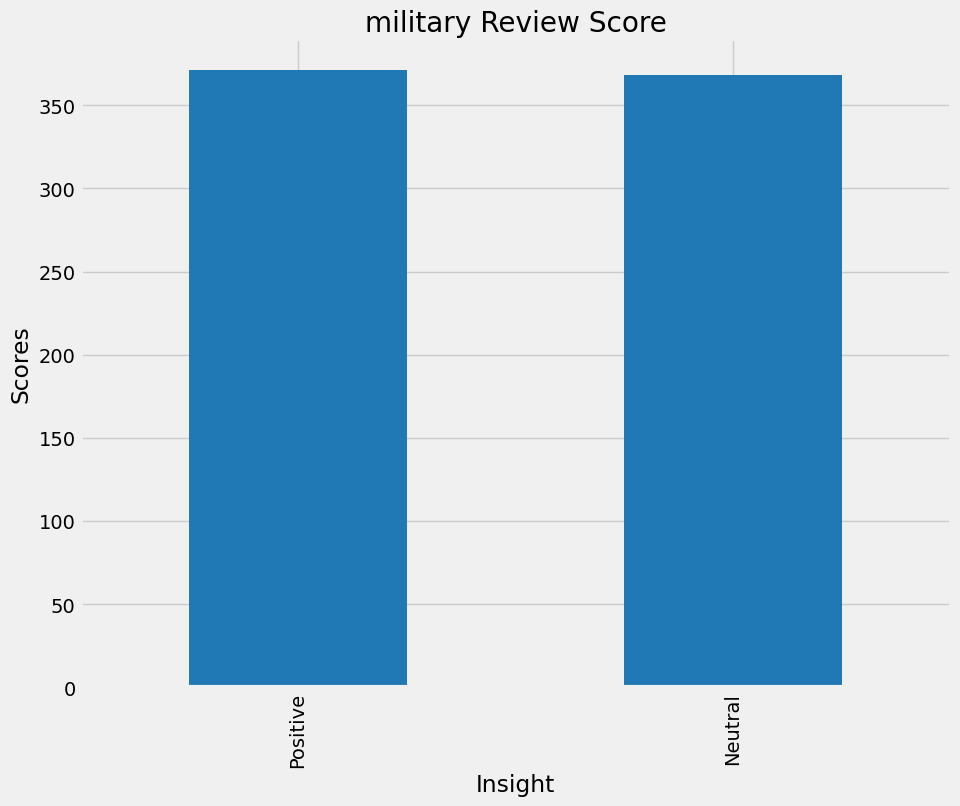

In [90]:
# Plot the values count of sentiment

plt.title("military Review Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df2["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

**WORDCLOUD FOR DATASCIENCE**

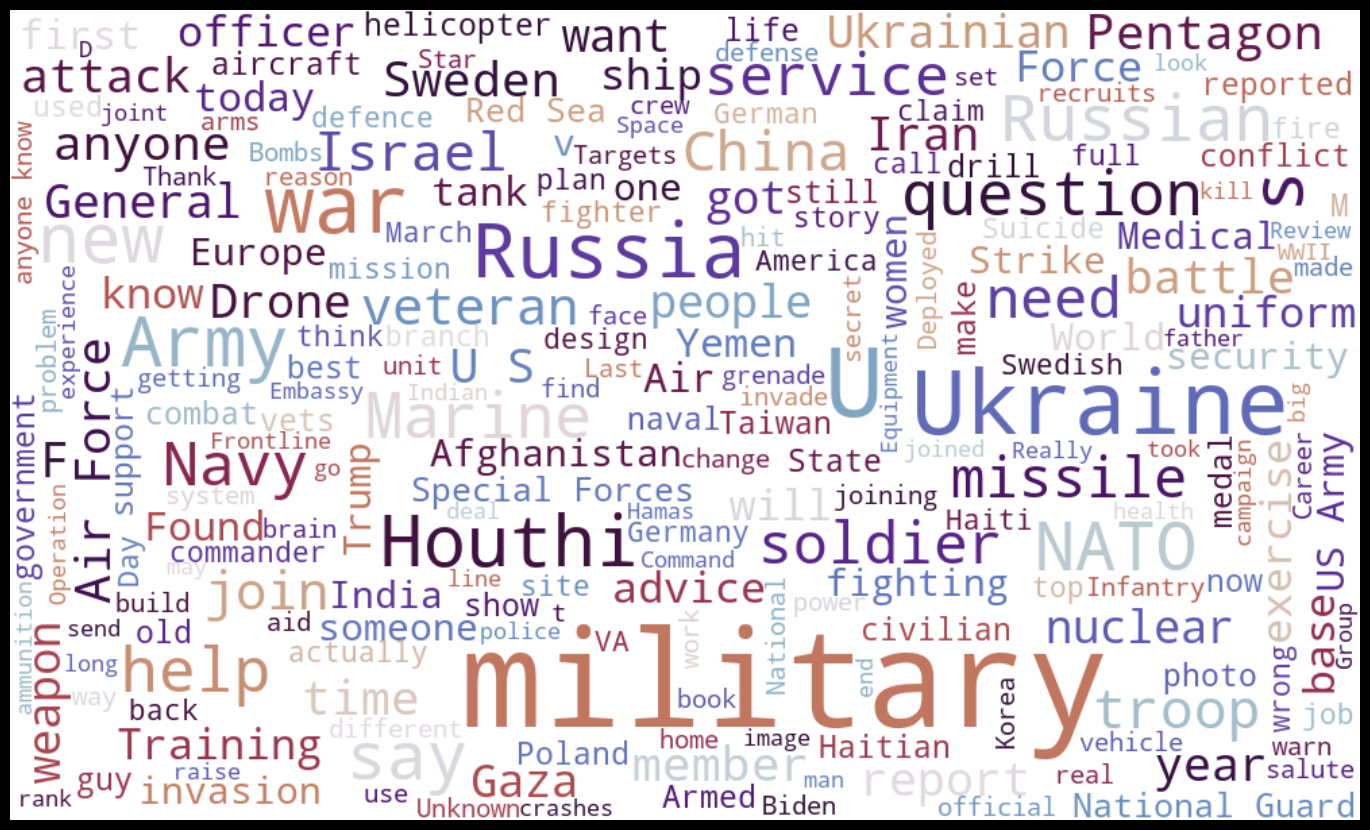

In [91]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in df2['Titles']] )
max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000,
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      contour_width = 0.01,
                      colormap = 'twilight',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)


plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();